In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.7.0


In [3]:
img=cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
img.shape

(555, 700, 3)

In [5]:
gray.shape

(555, 700)

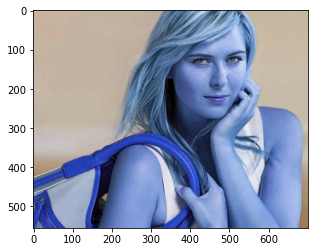

In [6]:
plt.imshow(img)

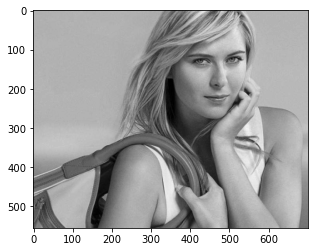

In [7]:
imgray=plt.imshow(gray,cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

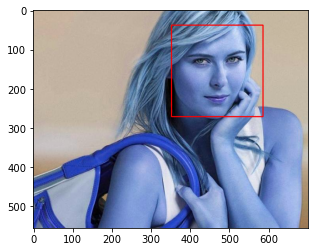

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

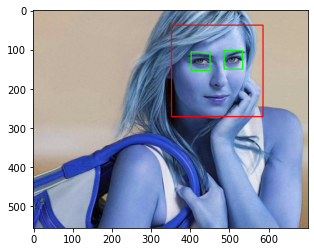

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

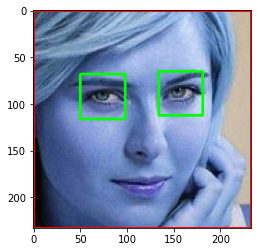

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

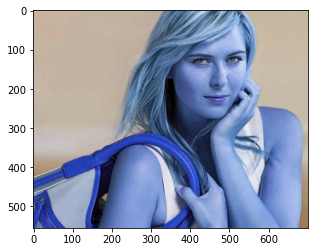

In [14]:
original_image = cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg")
plt.imshow(original_image)

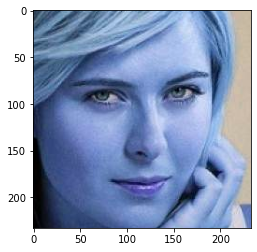

In [15]:
cropped_image=plt.imshow(get_cropped_image_if_2_eyes("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg"))
cropped_image

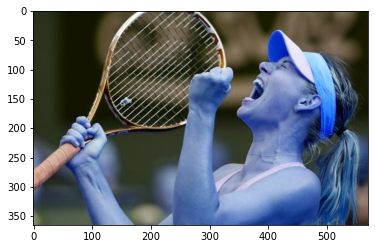

In [16]:
org_image_obstructed = cv2.imread("C://Users//Shriniwas//Desktop//CelebrityFaceRecognition//model//test_images//sharapova2.jpg")
plt.imshow(org_image_obstructed)

In [17]:
get_cropped_image_if_2_eyes("C://Users//Shriniwas//Desktop//CelebrityFaceRecognition//model//test_images//sharapova2.jpg")

In [18]:
path_to_data = "C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset"
path_to_cr_data = "C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\cropped"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\lionel_messi',
 'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\maria_sharapova',
 'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\roger_federer',
 'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\serena_williams',
 'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped):
                os.makedirs(cropped)
                cropped_image_dirs.append(cropped)
                print("Generating cropped images in folder: ",cropped)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

lionel_messi
Generating cropped images in folder:  C:\Users\Shriniwas\Desktop\CelebrityFaceRecognition\model\dataset\croppedlionel_messi
maria_sharapova
Generating cropped images in folder:  C:\Users\Shriniwas\Desktop\CelebrityFaceRecognition\model\dataset\croppedmaria_sharapova
roger_federer
Generating cropped images in folder:  C:\Users\Shriniwas\Desktop\CelebrityFaceRecognition\model\dataset\croppedroger_federer
serena_williams
Generating cropped images in folder:  C:\Users\Shriniwas\Desktop\CelebrityFaceRecognition\model\dataset\croppedserena_williams
virat_kohli
Generating cropped images in folder:  C:\Users\Shriniwas\Desktop\CelebrityFaceRecognition\model\dataset\croppedvirat_kohli


In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

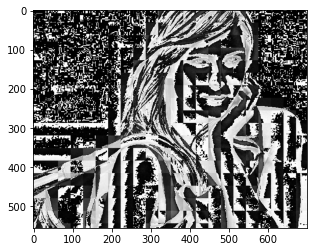

In [24]:
img=cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg")
s=w2d(img,'db1',5)
plt.imshow(s,cmap='gray')

In [25]:
celebrity_file_names_dict

{'lionel_messi': ['C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi1.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi2.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi3.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi4.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi5.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi6.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi7.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi/lionel_messi8.png',
  'C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecogniti

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [28]:
mg=cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [56]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8936170212765957

In [59]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      1.00      1.00         8
           2       0.80      0.67      0.73         6
           3       0.91      0.91      0.91        11
           4       0.86      1.00      0.92        12

    accuracy                           0.89        47
   macro avg       0.89      0.88      0.88        47
weighted avg       0.89      0.89      0.89        47



In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [61]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [62]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.700000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.621429,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.735714,{'logisticregression__C': 1}


In [63]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(X_test,y_test)

0.8936170212765957

In [65]:
best_estimators['random_forest'].score(X_test,y_test)

0.723404255319149

In [66]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8297872340425532

In [67]:
best_clf = best_estimators['svm']

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  1,  1,  0],
       [ 0,  8,  0,  0,  0],
       [ 1,  0,  4,  0,  1],
       [ 0,  0,  0, 10,  1],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

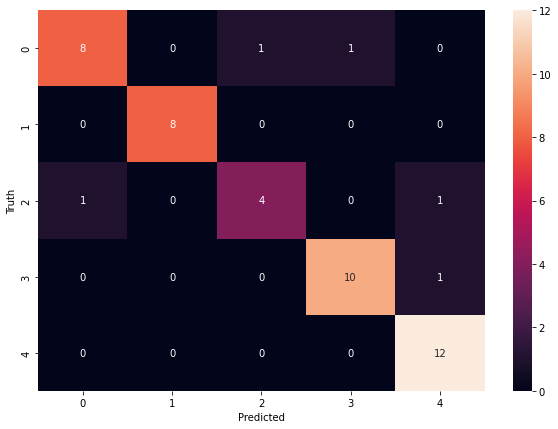

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

NOW AN ALTERNATE METHOD

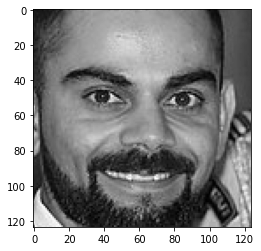

In [29]:
plt.imshow(gray,cmap='gray')

In [30]:
mean=gray[:,:].mean()

In [31]:
gray[gray[:,:]<mean]=0 
gray[gray[:,:]>=mean]=255

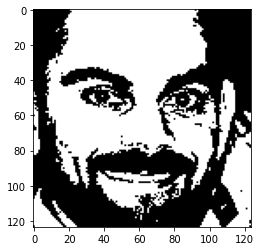

In [32]:
plt.imshow(gray,cmap='gray')

In [33]:
mean

110.23302549427679

In [34]:
mg=cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\test_images\\sharapova1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

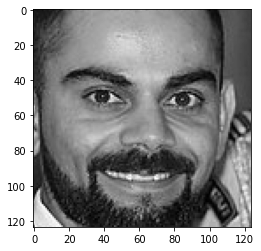

In [35]:
plt.imshow(gray,cmap='gray')

In [36]:
gray[gray[:,:]==0]=254
gray[gray[:,:]==255]=0
gray[gray[:,:]==254]=255

In [37]:
ig=cv2.imread("C:\\Users\\Shriniwas\\Desktop\\CelebrityFaceRecognition\\model\\dataset\\croppedlionel_messi\\lionel_messi18.png")
gry = cv2.cvtColor(ig,cv2.COLOR_BGR2GRAY)

In [38]:
gry[gry[:,:]==0]=253
gry[gry[:,:]==254]=0
gry[gry[:,:]==253]=254

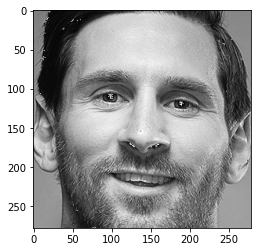

In [39]:
plt.imshow(gry,cmap='gray')

In [40]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray[gray[:,:]==0]=254
        gray[gray[:,:]==255]=0
        gray[gray[:,:]==254]=255
        scalled_gray = cv2.resize(gray, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_gray.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [41]:
len(X[0])

4096

In [42]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8936170212765957

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      1.00      1.00         8
           2       0.80      0.67      0.73         6
           3       0.91      0.91      0.91        11
           4       0.86      1.00      0.92        12

    accuracy                           0.89        47
   macro avg       0.89      0.88      0.88        47
weighted avg       0.89      0.89      0.89        47



In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [48]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.700000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.621429,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.735714,{'logisticregression__C': 1}


In [49]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_test,y_test)

0.8936170212765957

In [51]:
best_estimators['random_forest'].score(X_test,y_test)

0.6808510638297872

In [52]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8297872340425532

In [53]:
best_clf=best_estimators['svm']

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  1,  1,  0],
       [ 0,  8,  0,  0,  0],
       [ 1,  0,  4,  0,  1],
       [ 0,  0,  0, 10,  1],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

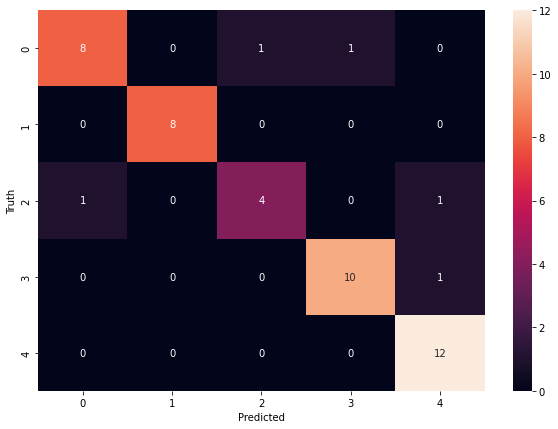

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')